In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 데이터 준비

In [4]:
mu1 = 3
mu2 = 7
sig1 = 0.2
sig2 = 0.4

x1 = np.random.normal(mu1, sig1, 7000)
x2 = np.random.normal(mu2, sig2, 3000)
X = np.hstack([x1, x2]).reshape(-1)
print(f"Data Shape : {np.shape(X)}")

Data Shape : (10000,)


In [39]:
def normal(mu, sigma, x):
    """ sigma = 분산 """
    return 1/np.sqrt(2 * np.pi * np.sqrt(sigma)) * np.exp(-((x - mu)**2) / (2*(sigma)))

def my_normal_plot_data(x_list, m, s):
    return [normal(m, s, x) for x in x_list]

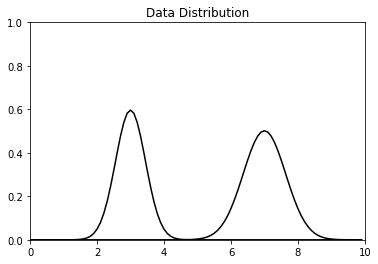

In [66]:
temp_x = [i/10 for i in range(100)]
temp_y_1 = [normal(mu1, sig1, i) for i in xx]
temp_y_2 = [normal(mu2, sig2, i) for i in xx]

plt.title("Data Distribution")
plt.plot(temp_x, temp_y_1, "-", c="black")
plt.plot(temp_x, temp_y_2, "-", c="black")
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.show()

In [73]:
d_size = len(X)
est_mu = [np.mean(temp_x), np.mean(temp_x)]
est_sig = [sig1/(sig1 + sig2), sig2/(sig1 + sig2)]
est_w = np.zeros((d_size, 2))
est_phi = np.array([0.2, 0.8])
est_n = [0, 0]

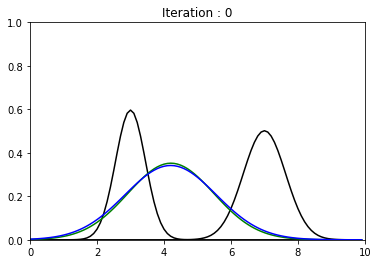

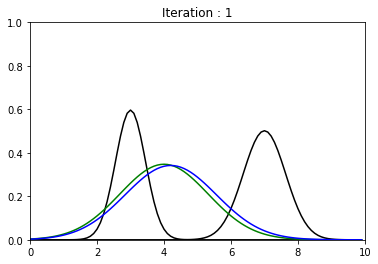

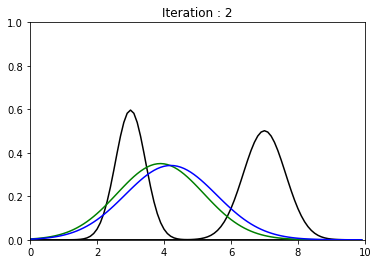

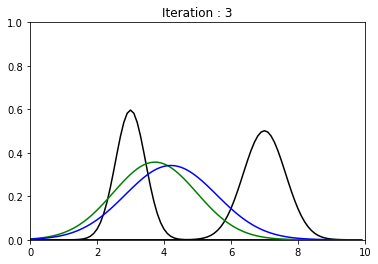

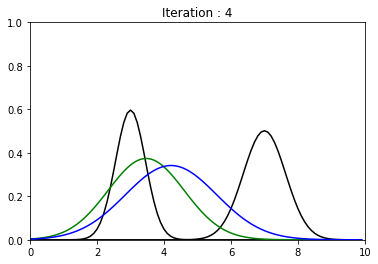

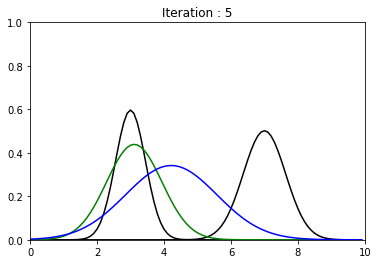

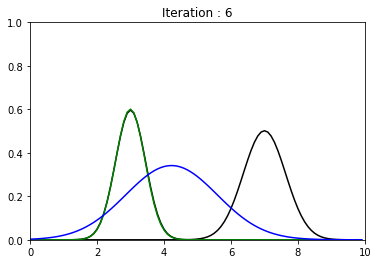

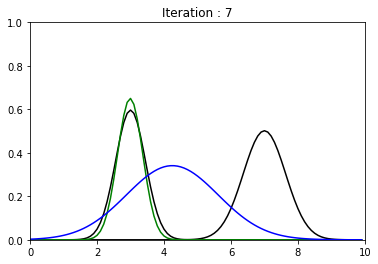

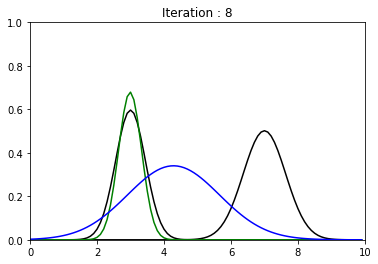

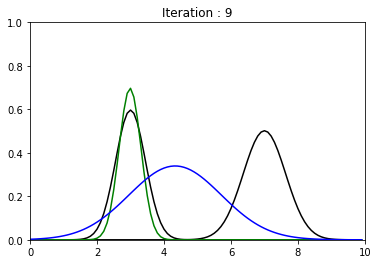

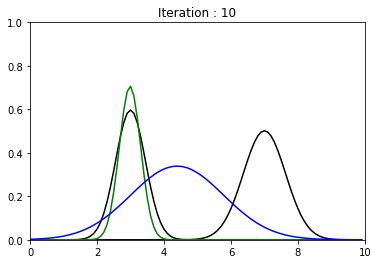

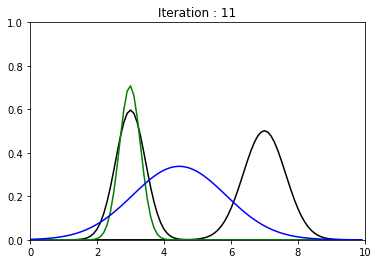

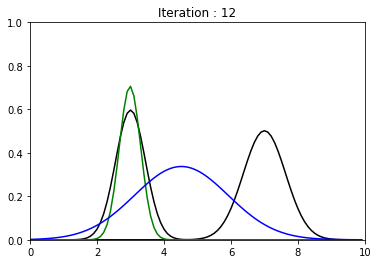

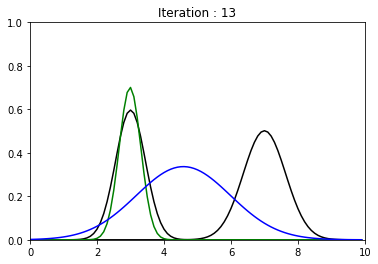

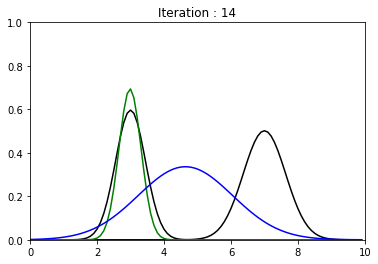

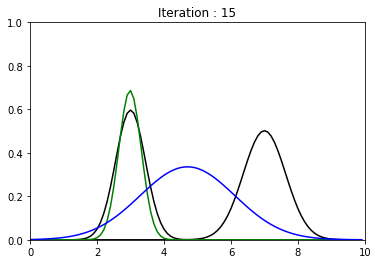

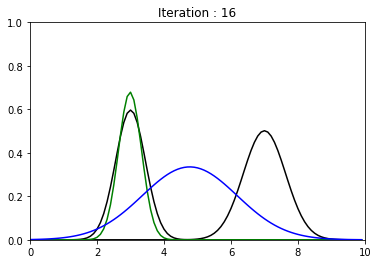

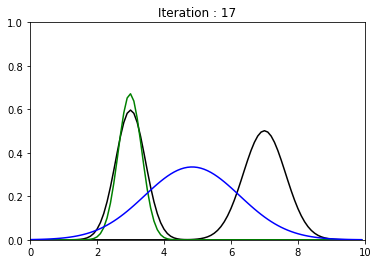

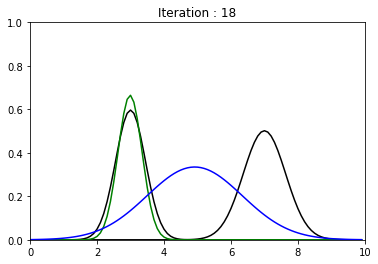

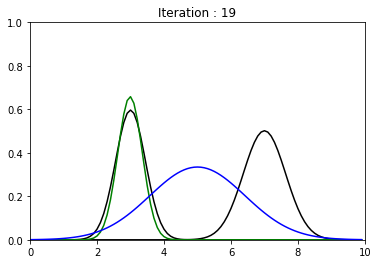

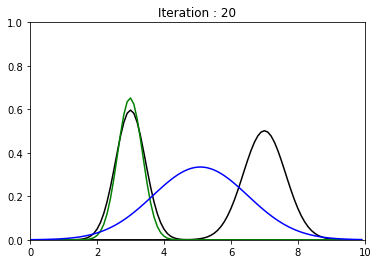

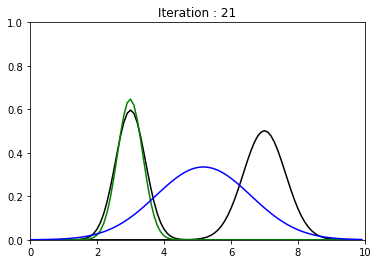

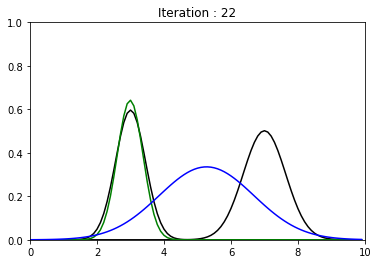

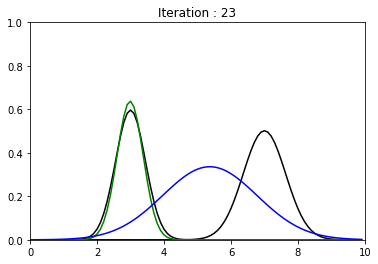

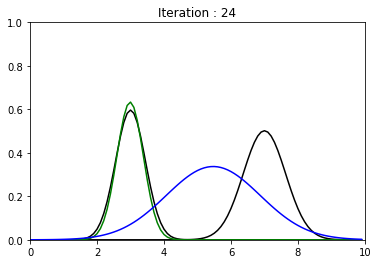

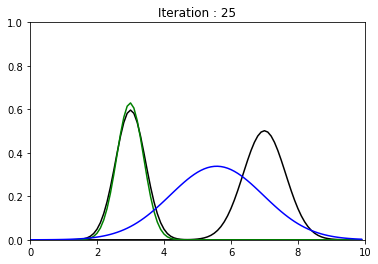

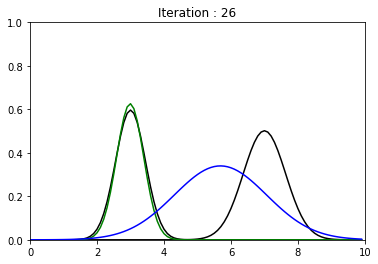

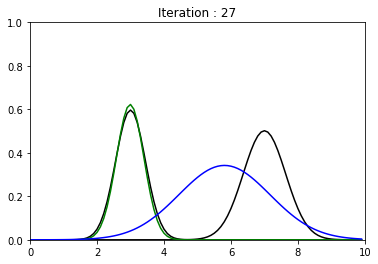

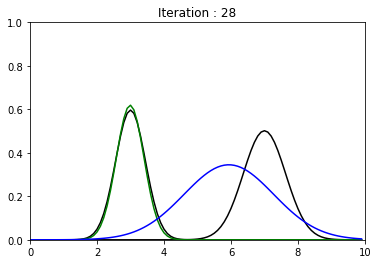

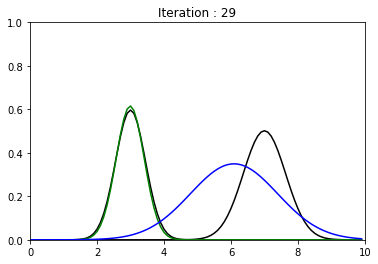

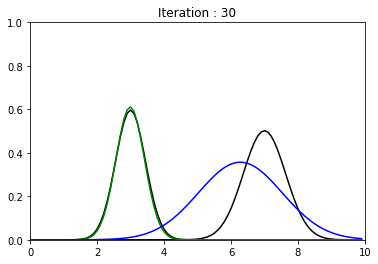

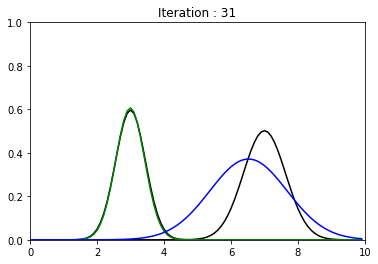

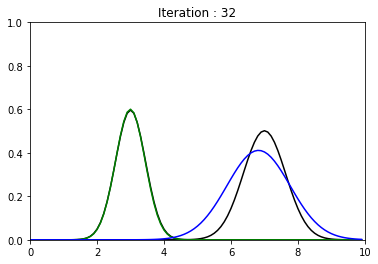

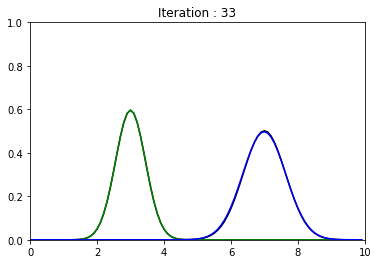

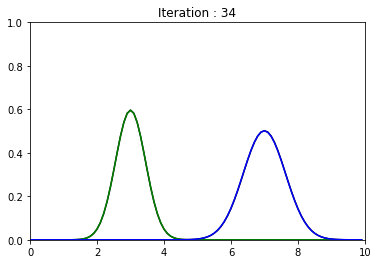

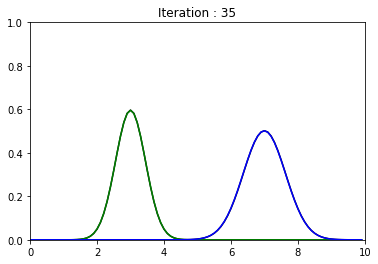

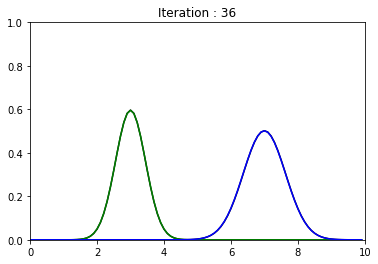

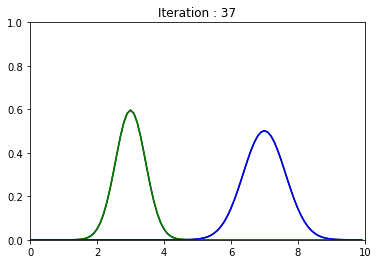

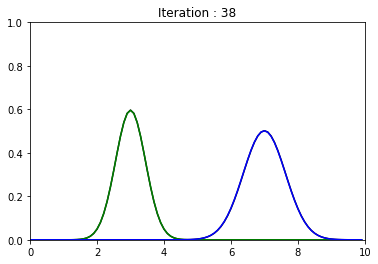

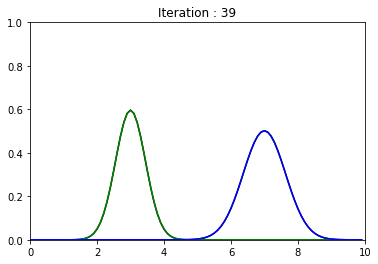

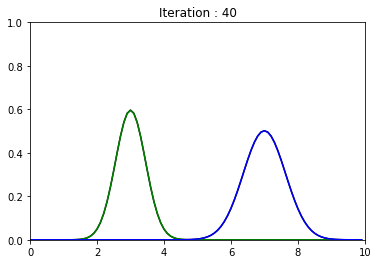

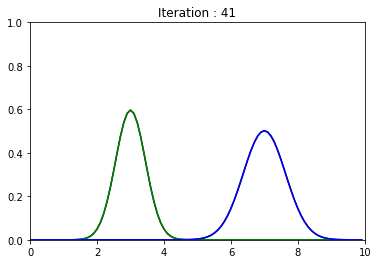

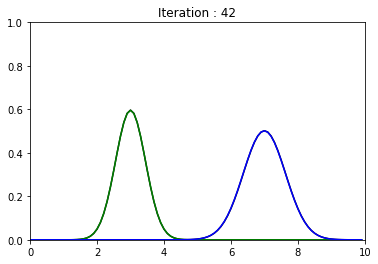

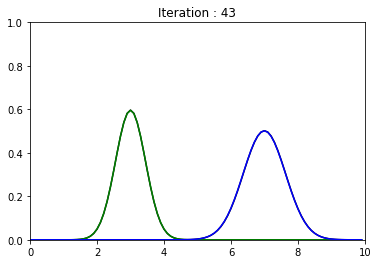

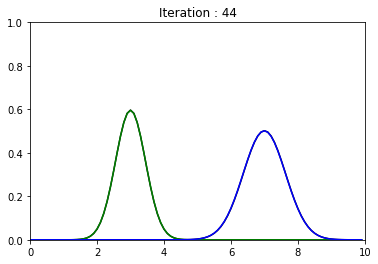

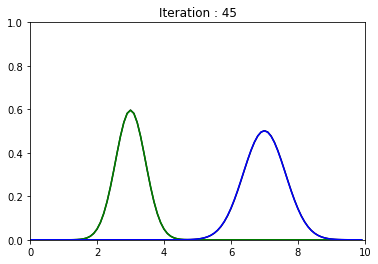

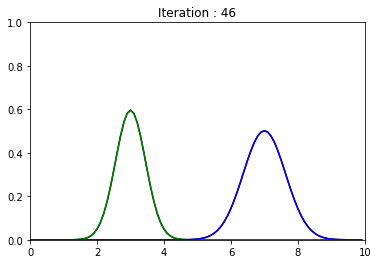

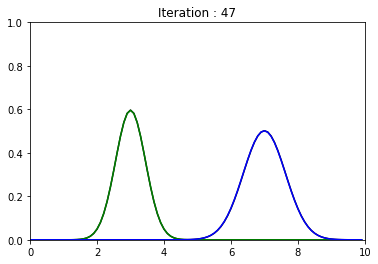

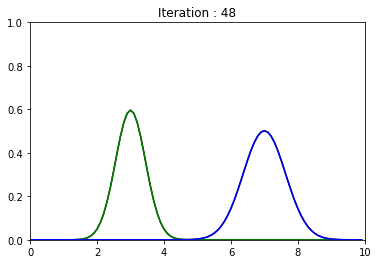

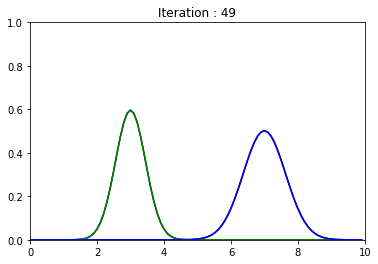

In [74]:
for iteration in range(50):
    # E-STEP
    for i in range(d_size):
        l1 = normal(est_mu[0], est_sig[0], X[i])
        l2 = normal(est_mu[1], est_sig[1], X[i])
        avg = (l1 * est_phi[0] + l2 * est_phi[1])
        est_w[i, 0] = (l1 * est_phi[0]) / (avg +1e-9)
        est_w[i, 1] = (l2 * est_phi[1]) / (avg + 1e-9)
    
    # M-STEP
    est_n[0] = sum(est_w[:, 0])
    est_n[1] = sum(est_w[:, 1])
    
    # mu 추정
    est_mu[0] = sum([X[i] * est_w[i, 0] for i in range(d_size)]) / (est_n[0] + 1e-9)
    est_mu[1] = sum([X[i] * est_w[i, 1] for i in range(d_size)]) / (est_n[1] + 1e-9)
    
    # sigma 추졍
    est_sig[0] = sum([((X[i] - est_mu[0])**2) * est_w[i, 0] for i in range(d_size)]) / est_n[0]
    est_sig[1] = sum([((X[i] - est_mu[1])**2) * est_w[i, 1] for i in range(d_size)]) / est_n[1]
    
    est_phi[0] = 1 / d_size * est_n[0]
    est_phi[1] = 1 / d_size * est_n[1]
    
#     if iteration % 1 == 0:
    plt.title(f"Iteration : {iteration}")
    plt.plot(temp_x, temp_y_1, "-", c="black")
    plt.plot(temp_x, temp_y_2, "-", c="black")
    plt.plot(temp_x, my_normal_plot_data(temp_x, est_mu[0], np.sqrt(est_sig[0])), 'g')
    plt.plot(temp_x, my_normal_plot_data(temp_x, est_mu[1], np.sqrt(est_sig[1])), 'b')
    plt.xlim(0, 10)
    plt.ylim(0, 1)
    plt.savefig(f"{iteration}.png")
    plt.show()